# Module 55: AR(p) Models
Author: Juliho Castillo Colmenares Ph.D.

In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
# Suppress warnings
warnings.filterwarnings("ignore")

In [4]:
# Step 1: Download historical data for Walt Disney (DIS) from Yahoo Finance
start_date = "2023-01-01"
end_date = "2023-03-31"
data = yf.download("DIS", start=start_date, end=end_date)
close_prices = data["Close"]

[*********************100%***********************]  1 of 1 completed


<Figure size 1000x500 with 0 Axes>

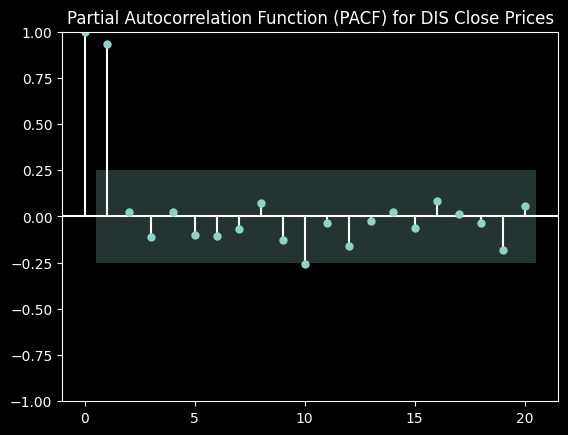

In [5]:
# Step 2: Plot Partial Autocorrelation Function (PACF) to determine the order of AR model (p)
plt.figure(figsize=(10, 5))
plot_pacf(close_prices, lags=20, method="ywm")
plt.title("Partial Autocorrelation Function (PACF) for DIS Close Prices")
plt.show()

In [6]:
# Step 3: Fit AR models with different lags and calculate AIC and BIC
aic_values = []
bic_values = []
max_lag = 10  # Testing up to AR(10)

for lag in range(1, max_lag + 1):
    model = AutoReg(close_prices, lags=lag).fit()
    aic_values.append(model.aic)
    bic_values.append(model.bic)

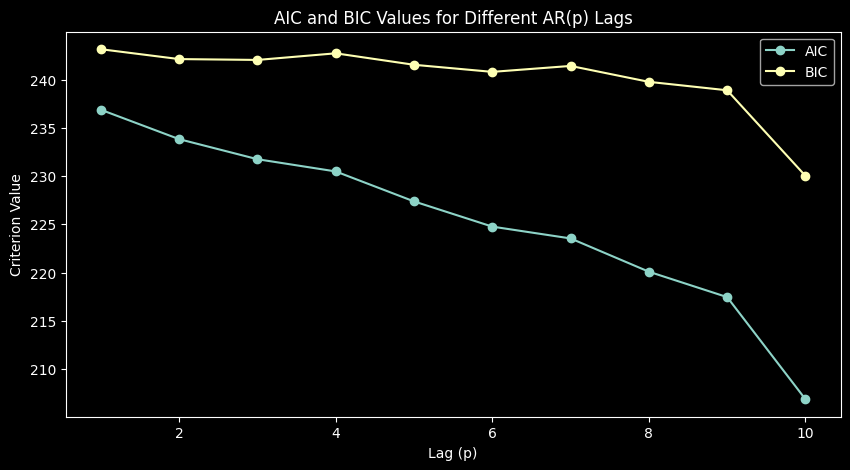

In [7]:
# Plot AIC and BIC for each lag
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_lag + 1), aic_values, marker="o", label="AIC")
plt.plot(range(1, max_lag + 1), bic_values, marker="o", label="BIC")
plt.xlabel("Lag (p)")
plt.ylabel("Criterion Value")
plt.title("AIC and BIC Values for Different AR(p) Lags")
plt.legend()
plt.show()

In [8]:
# Step 4: Select the optimal lag based on minimum AIC/BIC values
optimal_lag = np.argmin(aic_values) + 1
print(f"Optimal lag (p) selected based on AIC/BIC: {optimal_lag}")

Optimal lag (p) selected based on AIC/BIC: 10


In [9]:
# Step 5: Train-Test Split (70% train, 30% test)
train_size = int(len(close_prices) * 0.7)
train_data = close_prices[:train_size]
test_data = close_prices[train_size:]

In [10]:
# Step 6: Fit the AR model with the optimal lag on the training set
model = AutoReg(train_data, lags=optimal_lag).fit()

In [11]:
# Step 7: Forecast for the testing period and for April 2023 (30 days ahead)
test_predictions = model.predict(
    start=len(train_data), end=len(close_prices) - 1, dynamic=False
)
forecast = model.predict(
    start=len(close_prices), end=len(close_prices) + 29, dynamic=False
)

In [12]:
# Calculate 90% confidence intervals for the forecast based on residuals
residuals = train_data - model.fittedvalues
std_error = residuals.std()
confidence_interval_upper = forecast + 1.645 * std_error
confidence_interval_lower = forecast - 1.645 * std_error

In [13]:
# Step 8: Evaluate model accuracy on the test set
mse = mean_squared_error(test_data, test_predictions)
mape = mean_absolute_percentage_error(test_data, test_predictions)
print(f"Test Set MSE: {mse}")
print(f"Test Set MAPE: {mape}")

Test Set MSE: 69.730013133564
Test Set MAPE: 0.08101254663122126


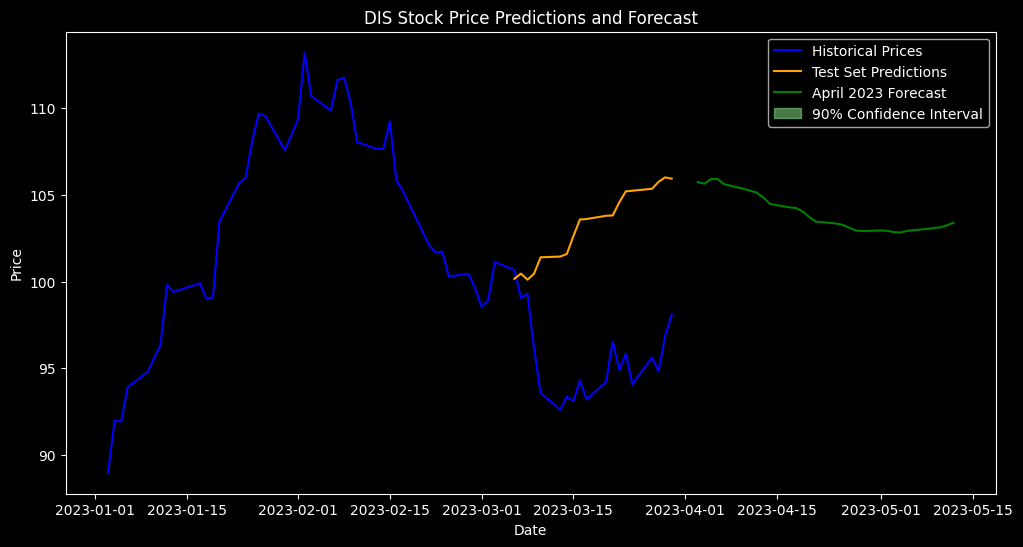

In [14]:
# Step 9: Plot the results
forecast_index = pd.date_range(start="2023-04-01", periods=30, freq="B")
plt.figure(figsize=(12, 6))
plt.plot(close_prices.index, close_prices, label="Historical Prices", color="blue")
plt.plot(
    test_data.index, test_predictions, label="Test Set Predictions", color="orange"
)
plt.plot(forecast_index, forecast, label="April 2023 Forecast", color="green")
plt.fill_between(
    forecast_index,
    confidence_interval_lower[:30],
    confidence_interval_upper[:30],
    color="lightgreen",
    alpha=0.5,
    label="90% Confidence Interval",
)
plt.legend()
plt.title("DIS Stock Price Predictions and Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()